# Classifying Heart Disease using UC Irvine ML Repository

I will use the patient's health attributes to predict the heart disease diagnosis.  Since heart disease diagnosis is a categorical variable, this is a classification problem. 

## Dataset

There are 303 instances in the dataset and 13 attributes.
The target variable is “num” and it is on an integer scale of 1-4 for the four diagnoses of heart disease. 
The predictor attributes are detailed below: 
1. age = Age of patient 
2. sex = Sex of patient 
3. cp = chest pain type
4. trestbps = resting blood pressure
5. chol = serum cholesterol in mg/dl
6. fbs = fasting blood sugar > 120 mg/d
7. restecg = resting electrocardiographic results
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by fluoroscopy
13. thal = 51 thal: 3 = normal; 6 = fixed defect; 7 = reversible defect

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features 
y = heart_disease.data.targets 


# Combine features and target labels using the index
heart_df = pd.concat([X, y], axis=1)

# Display the combined DataFrame
heart_df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
# Checking the column information, data types and counts
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [4]:
# The "num" variable is the label that diagnosis Heart disease. How many instances of each label?
heart_df["num"].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [5]:
# Getting important descriptive info about the attributes 
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### Insights
- Some columns have missing values that need to be addressed (i.e. thal and ca)

## Create train and test sets

I chose to split the dataset into 80% training and 20% testing because I want to have enough data to train the model, while have a small amount of new data to evaluate the performance of the models. 

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(heart_df, test_size=0.2, random_state=42)

## Visualize the data

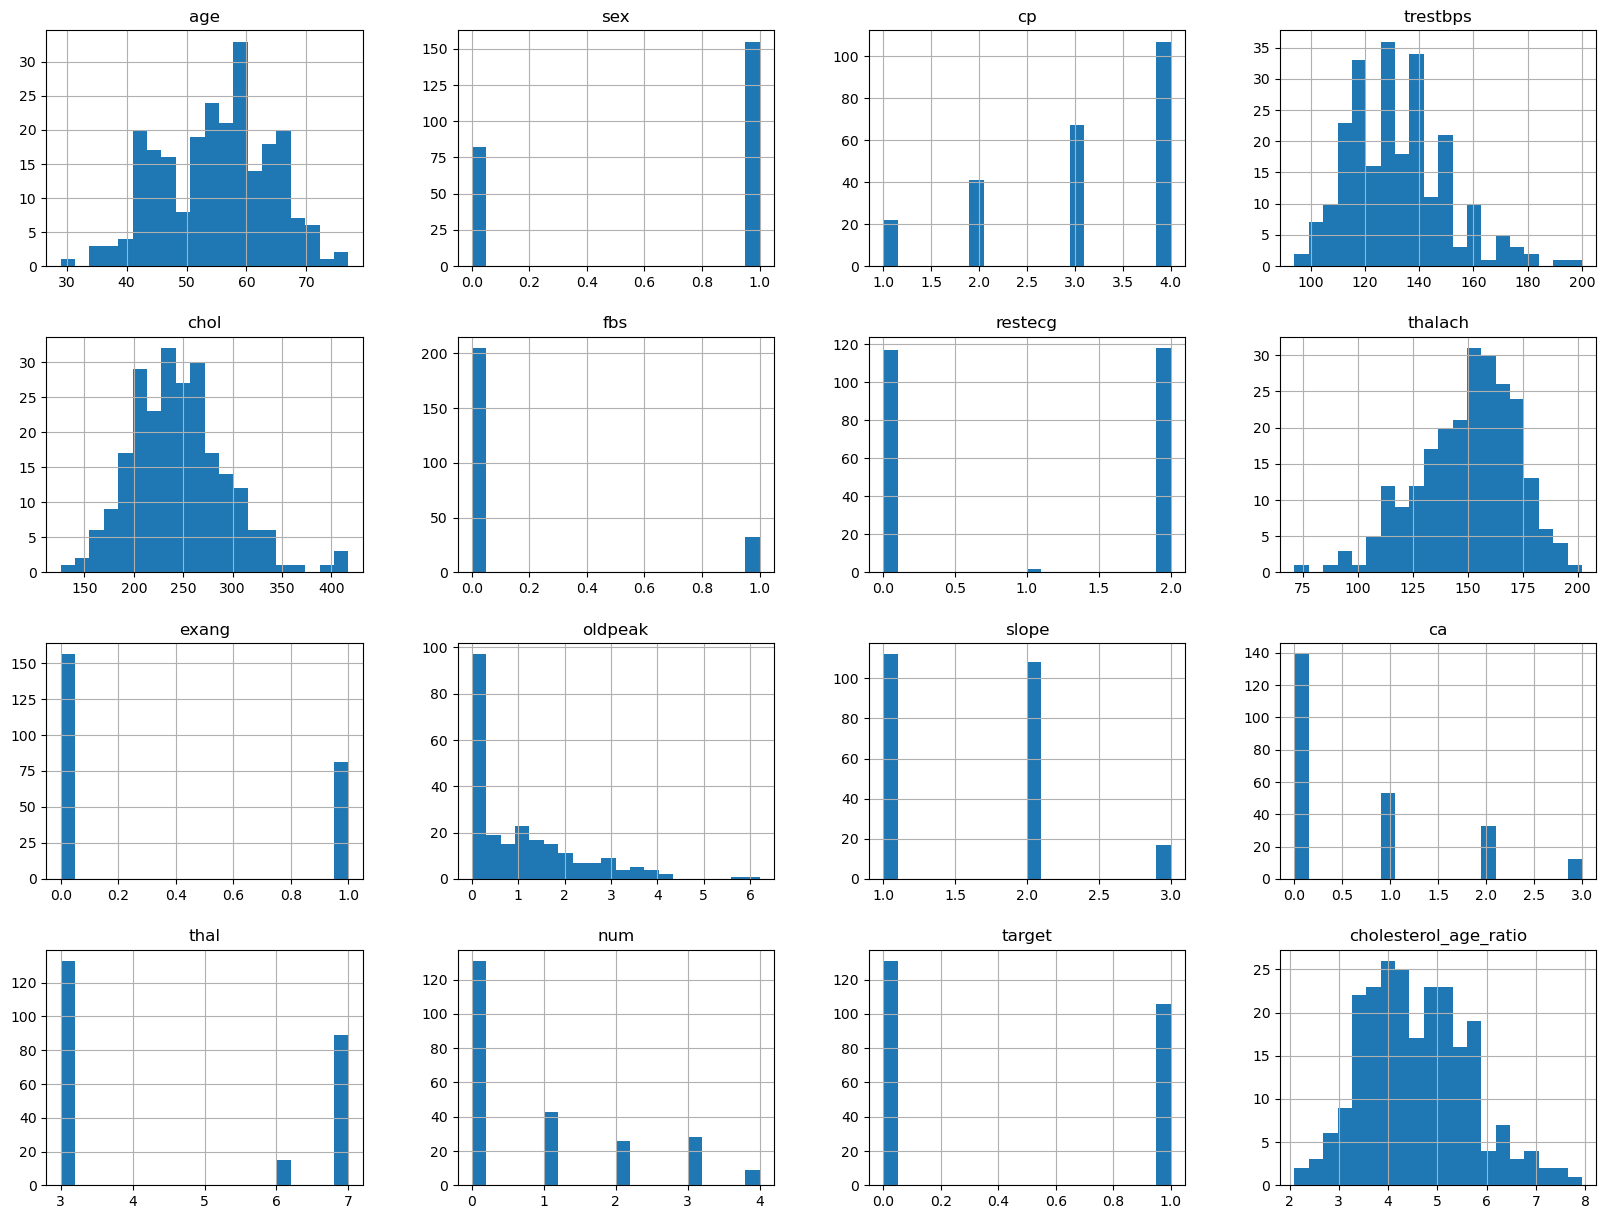

In [62]:
# Understanding the distribution of instances across all the features 
%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=20, figsize=(20,15))
plt.show()

### Insights: 
1. The age range of the patients is about 30 to 80. 
2. The most common chest pain type is 4.0.
3. Most patients have a resting blood pressure of 130.
4. Most patients have 230 serum cholesterol in mg/dl.
5. Most patients are labelled as 0, meaning no heart disease diagnosis.

#### Correlation Analysis

Here we see what features are correlated with the target variable "num." We see that "ca" (the number of blood vessels) is most correlated with the target.

In [9]:
corr_matrix = heart_df.corr()
corr_matrix["num"].sort_values(ascending=False)

num         1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
thalach    -0.415040
Name: num, dtype: float64

## Prepare the data

In the data preparation step, I checked if there are any missing values in dataset. Given that there was a small amount of missing values, I decided to drop those instances. Another option I had was to impute the values, such as filling in the missing values with a mean or median value. In this dataset, it didn't make sense to impute because we are classifying heart disease and we should not guess or put placeholders for human health metrics. 

In [10]:
# Check for missing values in each column
missing_values = test_set.isnull().sum()

# Display the number of missing values for each column
print(missing_values)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        0
num         0
dtype: int64


In [11]:
test_set = test_set.dropna()

In [12]:
# Check for missing values in each column
missing_values = test_set.isnull().sum()

# Display the number of missing values for each column
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [13]:
train_set = train_set.dropna()

## Model 1: KNN Classifer

I chose to use KNN classifer because this method is an easy to use and computationally inexpensive way to classify data points. Given the quick compiling time, I knew I could easliy make modifications through the process. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming heart_df is your DataFrame with features and target labels
# Separate features (X) and target labels (y)

X_train = train_set.drop("num", axis=1) # copy and drop labels for training set
y_train = train_set["num"].copy()

X_test = test_set.drop("num", axis=1) # copy and drop labels for training set
y_test = test_set["num"].copy()

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)


### Evaluate and fine-tune the first model

I evaluated the KNN model by producing a confusion matrix, accuracy score and classification report. The confusion matrix showed that the model did a good job classifying the instances labelled "0." But the model did not perform well to predict the other heart disease diagnosis levels. 

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_classifier, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[116,  11,   0,   3,   1],
       [ 34,   2,   4,   3,   0],
       [ 18,   5,   2,   1,   0],
       [ 22,   4,   2,   0,   0],
       [  7,   0,   2,   0,   0]])

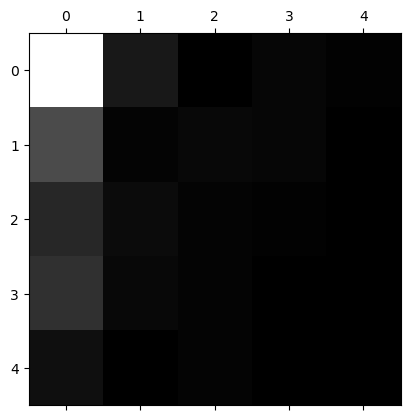

In [16]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [17]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

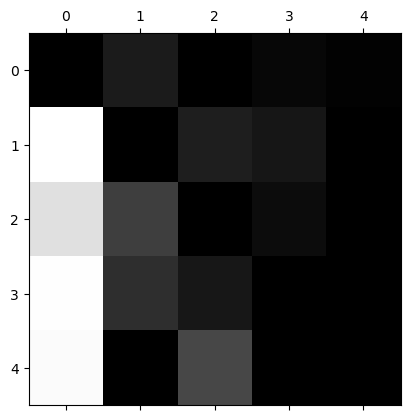

In [18]:
import numpy as np

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Display classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.45
              precision    recall  f1-score   support

           0       0.56      0.93      0.70        29
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.45        60
   macro avg       0.11      0.19      0.14        60
weighted avg       0.27      0.45      0.34        60

[[27  2  0  0  0]
 [ 9  0  2  0  0]
 [ 6  2  0  1  0]
 [ 4  2  1  0  0]
 [ 2  2  0  0  0]]


/Users/ashleyvictor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyvictor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ashleyvictor/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2: Decision Tree Model

I chose the Decision Tree Model because this model can handle numeric and categorical variables well for classification purposes. Also for the decision tree model, the data doesn't have to be normally distributed. The model will perform well in skewed distributions. 

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluate the Decision Tree Model 

The decision tree model produced an accuracy score of 43.3%, which is fairly low. Looking back at my dataset, I realized that the data is not evenly distributed. In the next part of my report, I will talk about how I addressed this issue. 

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_dt = decision_tree_classifier.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

# Display classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

# Display confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)


0.43333333333333335
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         9
           3       0.11      0.14      0.12         7
           4       0.00      0.00      0.00         4

    accuracy                           0.43        60
   macro avg       0.17      0.20      0.18        60
weighted avg       0.36      0.43      0.39        60

[[25  1  1  1  1]
 [ 5  0  2  2  2]
 [ 4  1  0  3  1]
 [ 1  3  1  1  1]
 [ 0  1  1  2  0]]


# Binning 

The accuracy for the KNN model and desision tree modle classifing the levels of heart disease diagnosis was 45% and 43.3% respectively. The distribution of instances in each heart disease diagnosis category is skewed to having more instances labelling "0" as opposed to the levels 1-4. To address the imbalanced dataset, I binned the instances with the levels of heart disease diagnosis from 1-4 into one category called "1." The instances labelled "0," meaning no heart disease remained as "0." The "categorize_values" function below defines a new column in the dataset with the new labels and the column is now called **"target."**

In [23]:
# categorize_values function bins the instances into whether or not the patient has heart disease with the labels 0 and 1
def categorize_values(df, num_column_name='num'):
    # Create a new column for categories
    df['target'] = df[num_column_name].apply(lambda x: 0 if x == 0 else 1)
    return df

In [24]:
test_df = categorize_values(test_set) #apply the categorize_funtion to the testing set

In [25]:
train_df = categorize_values(train_set) #apply the categorize_funtion to the training set

In [26]:
train_df #check to see if the function worked correctly

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target
132,29,1,2,130,204,0,2,202,0,0.0,1,0.0,3.0,0,0
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0,0,0
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,3.0,0,0
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,0,0
176,52,1,4,108,233,1,0,147,0,0.1,1,3.0,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0,1,1
71,67,1,4,125,254,1,0,163,0,0.2,2,2.0,7.0,3,1
106,59,1,4,140,177,0,0,162,1,0.0,1,1.0,7.0,2,1
270,61,1,4,140,207,0,2,138,1,1.9,1,1.0,7.0,1,1


# KNN model with newly binned data


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming heart_df is your DataFrame with features and target labels
# Separate features (X) and target labels (y)

X_train = train_df.drop("target", axis=1) # copy and drop labels for training set
y_train = train_df["target"].copy()

X_test = test_df.drop("target", axis=1) # copy and drop labels for training set
y_test = test_df["target"].copy()

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_classifier, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[91, 40],
       [52, 54]])

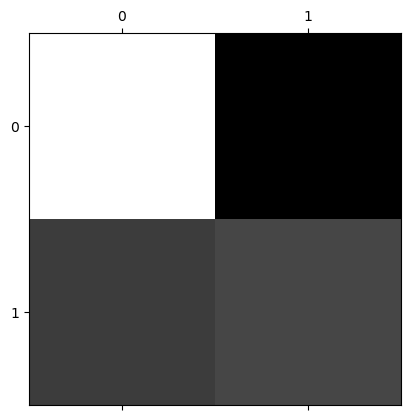

In [31]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Display classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.6666666666666666
              precision    recall  f1-score   support

           0       0.64      0.72      0.68        29
           1       0.70      0.61      0.66        31

    accuracy                           0.67        60
   macro avg       0.67      0.67      0.67        60
weighted avg       0.67      0.67      0.67        60

[[21  8]
 [12 19]]


## Insights

The orignal KNN Classifier model that used the not binned data produced ac accuracy of 45%. The same KNN Classifier model that used the binned data produced an accuracy of 66.67%. Binning the data produced a higher accuracy score revealing that the orginal dataset did not have enough instances labelled 1-4 levels of heart disease diagnosis.

## Fine Tune the KNN Model

The model currently used n = 5, meaning there are 5 nearest neighbors if a new data instance was added. In the fine-tuning step, the value for n will be changed to see if the model performance can be improved. 

### KNN model when n nearest neighbor is 9

n = 9, accuracy 73.3%
n = 10, accuracy 68.3%
n = 12, accuracy 73.3%
n = 13, accuracy 70%
n = 15, accuracy 71.67%

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming heart_df is your DataFrame with features and target labels
# Separate features (X) and target labels (y)

X_train = train_df.drop("target", axis=1) # copy and drop labels for training set
y_train = train_df["target"].copy()

X_test = test_df.drop("target", axis=1) # copy and drop labels for training set
y_test = test_df["target"].copy()

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

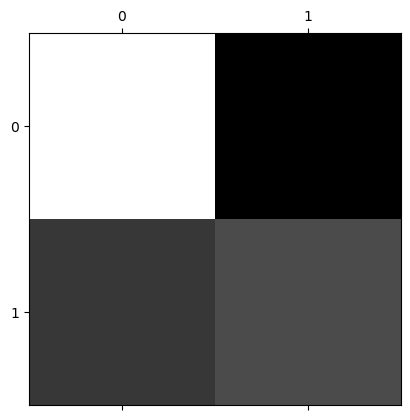

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_classifier, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Display classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

0.7333333333333333
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        29
           1       0.76      0.71      0.73        31

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.73      0.73      0.73        60

[[22  7]
 [ 9 22]]


# Decision Tree Model with newly binned data

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(min_samples_leaf = 2, random_state=42)

# Train the model
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=42)

In [47]:
# Make predictions on the test set
y_pred_dt = decision_tree_classifier.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

# Display classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

# Display confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[29  0]
 [ 0 31]]


### Compare the performance of model 1 and model 2

The performance of the two models were difficult to evaluate. Model 2, the Decision Tree, produced a 100% accuracy after binning. Model 1, the KNN classifier, produced a 73.3% accuracy after binning and fine-tuning. Although Model 2 had a higher accuracy than Model 1, I suspect that Model 1 is the preferred model. Model 2 might be experiencing overfitting. At this stage, I need to get new testing data and produce an accuracy score to see if the model overfits a new set of data as well. For these reasons, I will conclude that Model 1 (the KNN Classifer) is the better model because it produces more generalized results. 

### Develop a final model

In the feature construction step, a "cholesterol to age ratio" feature was created to better understand if that patient had a appropriate cholesterol level for that person's age. 

In [53]:
# Feature Construction: Creating a cholesterol to age ratio feature 

train_df['cholesterol_age_ratio'] = train_df['chol'] / train_df['age']
test_df['cholesterol_age_ratio'] = test_df['chol'] / test_df['age']

In [54]:
train_df #check if the new column added 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,target,cholesterol_age_ratio
132,29,1,2,130,204,0,2,202,0,0.0,1,0.0,3.0,0,0,7.034483
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0,0,0,2.210526
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,3.0,0,0,3.391304
75,65,0,3,160,360,0,2,151,0,0.8,1,0.0,3.0,0,0,5.538462
176,52,1,4,108,233,1,0,147,0,0.1,1,3.0,7.0,0,0,4.480769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,7.0,1,1,5.240741
71,67,1,4,125,254,1,0,163,0,0.2,2,2.0,7.0,3,1,3.791045
106,59,1,4,140,177,0,0,162,1,0.0,1,1.0,7.0,2,1,3.000000
270,61,1,4,140,207,0,2,138,1,1.9,1,1.0,7.0,1,1,3.393443


Given the accuracy score of the decision tree model developed earlier, I decided to continue using the KNN classifier. In order to improve the accuracy of the KNN model, I combined KNN with Random Forest model. This is an ensemble method using the improved version of the KNN model and a new method, Random Forest. 

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
X_train = train_df.drop("target", axis=1) # copy and drop labels for training set
y_train = train_df["target"].copy()

X_test = test_df.drop("target", axis=1) # copy and drop labels for training set
y_test = test_df["target"].copy()

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)
ensemble_preds = np.round((y_pred + rf_preds) / 2)


## Evaluate the final model 

In this section, I used the accuracy_score function to find the accuracy of the ensemble model. The ensemble method of KNN model and Random Forest produced an accuracy score of 85%. 

In [60]:
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)
print(f'Ensemble Model Accuracy: {ensemble_accuracy:.2f}')


Ensemble Model Accuracy: 0.85


# Reflect on the performance of the model

One area of improvement is having more data points for the heart disease daignosis levels 1-4. The instances labelled with "0" (no heart disease) had the most instances. Using a dataset with a more balanced distribution would have led to the development of a model that can classify a patient about the different levels of heart disease diagnosis. 

Prior to implementing the ensemble method, I could have performed more feature engineerng to understand which features were more important and relevant to the objective of predicting heart disease disgnosis levels. 

The final ensemble method works best on determining if a patient is labelled "0" (no heart disease). For the instances where the patient is labelled "1" (does have heart disease), the feactures (metrics) have a larger range of values. In the data preparation step, I binned the instances with levels 1-4 heart diagnosis (with 4 being severe heart disease). A person with the highest diagnosis of heart disease would have a very different number for cholestrol than a person labelled as 1 or 2. Therefore, trying to group together varying levels of heart disease diagnosis into one category may confuse the machine learning model. 

The main challenges in the project was understanding how to address the imbalanced data. I overcame this challenge by binning the data but I do know there are other methods, such as SMOTE that creates synthetic samples to help create a more balanced dataset. Another challenge was understanding how to address the overfitting in the decision tree model. I tried to change some of the parameters but it didn't impact the accuracy score, which led me to develop an ensemble method. 